In [1]:
#indir = "/data/Mito_Trace/output/annotation_clones/data/cd34norm/MTblacklist/DE_large"
indir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/vireo/nclones20/annotation_clones/DE_large/minPct_0.01__logThresh_0"

se_indir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/vireo/nclones20/annotation_clones/DE_large"
n_donors = 4
cdf_thresh = 0.3

n_top_genes = 5
n_top_clones = 3
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"


In [2]:
# Parameters
indir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/annotation_clones/DE_large/minPct_0__logThresh_0.1"
se_indir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/annotation_clones/DE_large"
n_donors = 4
cdf_thresh = 0.3


In [3]:
source(utils_script)

Attaching SeuratObject



In [4]:
outdir <- paste0(indir, "/", "cdf_thresh__", (cdf_thresh))
dir.create(outdir)

Warning message in dir.create(outdir):
“'/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/annotation_clones/DE_large/minPct_0__logThresh_0.1/cdf_thresh__0.3' already exists”


In [5]:
library(Seurat)
library(Signac)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)
library("ComplexHeatmap")
library(motifmatchr)
library(JASPAR2020)
library(TFBSTools)
library(BSgenome.Hsapiens.UCSC.hg38)



Attaching package: ‘cowplot’




The following object is masked from ‘package:patchwork’:

    align_plots





Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Loading required package: grid



ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




Loading required package: BSgenome



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min




Loading required package: S4Vectors



Loading required package: stats4




Attaching package: ‘S4Vectors’




The following object is masked from ‘package:future’:

    values




The following objects are masked from ‘package:dplyr’:

    first, rename




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges




Attaching package: ‘IRanges’




The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice




Loading required package: GenomeInfoDb



Loading required package: GenomicRanges



Loading required package: Biostrings



Loading required package: XVector




Attaching package: ‘Biostrings’




The following object is masked from ‘package:grid’:

    pattern




The following object is masked from ‘package:base’:

    strsplit




Loading required package: rtracklayer



## Import seurat object

In [6]:
se <- readRDS(file.path(se_indir, "se.clonesfilt.rds"))
init.large.clones <- read.csv(file.path(se_indir, "large_clones.csv"))
large.clones <- init.large.clones %>% filter(cdf.norm<cdf_thresh)

large.clones <- check.if.one.clone(large.clones, init.large.clones, n_top_clones)
large.clones

[1] 4
[1] "i 1 donor 0"
[1] "i 2 donor 1"
[1] "i 3 donor 2"
[1] "only 1 clone. Using top 3 clones"
[1] "i 4 donor 3"
[1] "only 1 clone. Using top 3 clones"


X,donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<int>,<int>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<int>
1,0,0,0.17990440,360,0_0,0.08995220,360,1
2,0,2,0.15394845,255,0_2,0.16692643,615,2
3,0,4,0.13733505,221,0_4,0.23559395,836,3
8,1,0,0.14526665,220,1_0,0.07263333,220,1
9,1,1,0.11478933,172,1_1,0.13002799,392,2
10,1,2,0.10036769,156,1_2,0.18021183,548,3
11,1,5,0.09456075,153,1_5,0.22749221,701,4
12,1,10,0.09365953,123,1_10,0.27432198,824,5
18,2,0,0.25786216,318,2_0,0.12893108,318,1


In [7]:
se <- subset(se, subset= name %in% factor(large.clones$name))

In [8]:
Idents(se) <- "name"

Saving 6.67 x 6.67 in image



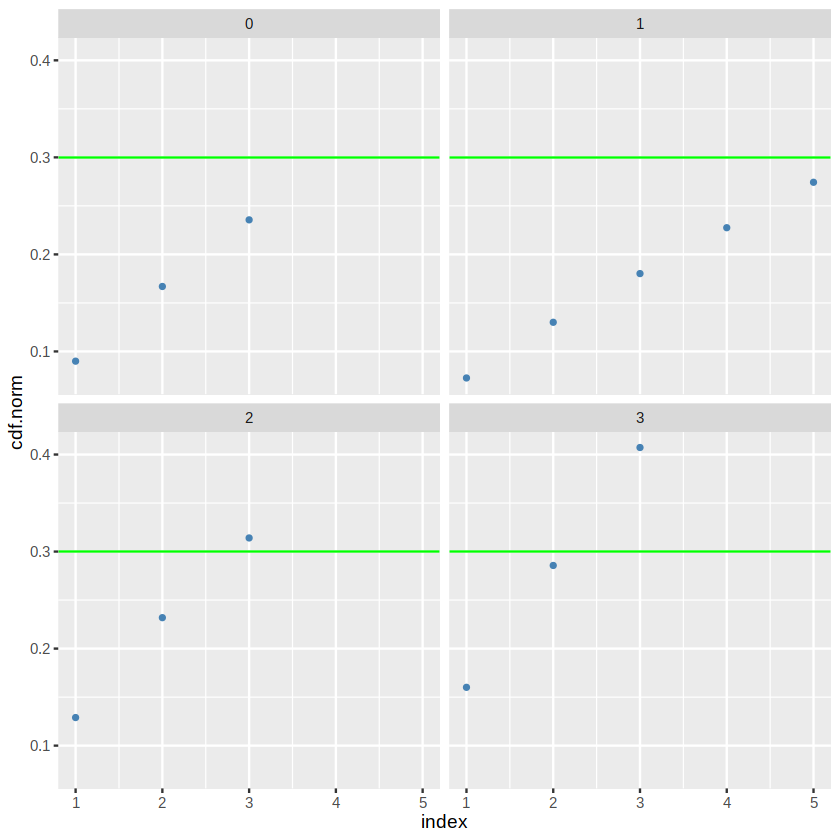

In [9]:
p <- ggplot(data = large.clones, aes(index, cdf.norm)) +
  geom_point(color = "steelblue", size = 1) +
  facet_wrap(~ donor) 

p <- p + geom_hline(yintercept=cdf_thresh, color='green') 
p
ggsave(file.path(outdir, "large.clones.cdf.png"))



In [10]:
## Get motif names

# DefaultAssay(se) <- "chromvar"
# chrom.var.names <- GetAssayData(se)
# DefaultAssay(se) <- "ATAC"
# motifs <- Motifs(se)
# #Motifs(se)@motif.names

# head(chrom.var.names)
# row.names(chrom.var.names) <- sapply(row.names(chrom.var.names), function(x) {Motifs(se)@motif.names[[x]]})
# head(chrom.var.names)




## TF DE

## Summarize results

In [11]:
# all.names.sig <- c()
# DefaultAssay(se) <- "chromvarnames"
# for (d in 0:(n_donors-1)){
#     print('donor')
#     print(d)
#     curr.indir <- file.path(indir, paste0("donor", d, "_TF"))
#     #curr.outdir <- file.path(outdir, paste0("donor", d, "_TF"))
#     #dir.create(curr.outdir)
#     donor.large.clones <- large.clones %>% filter(donor==d)
#     clones.filt.ids <- sort(donor.large.clones$lineage)
#     se.filt <- subset(se, subset = (donor==d) & (lineage %in% donor.large.clones$lineage))
#     if (length(clones.filt.ids) < 2){
#         print("0 or 1 clone found. not running")
#         next
#     }
#     pairs = combn(clones.filt.ids,2)
#     names.sig <- c()

#     for (i in 1:dim(pairs)[2]){
#         print(pairs[,i])
#         print(paste("comparison #", i))
#         a = pairs[1,i]
#         b = pairs[2,i]
#         curr.tf.da <- read.csv(file.path(curr.indir, 
#                                          paste0("clones_",a,"__", b,".DE.TF.csv"))) %>% 
#                       arrange(p_val)
#         row.names(curr.tf.da) <- curr.tf.da$X  #sapply(curr.tf.da$X, function(m) {motifs@motif.names[[m]]})
#         names.sig <- c(names.sig, head(row.names(curr.tf.da), n_top_genes))
#         all.names.sig <- c(all.names.sig, head(row.names(curr.tf.da), n_top_genes))
#         }
#     names.sig <- unique(names.sig)
    
#     gally <- GGally::ggpairs(curr.tf.da[,c("p_val", "p_val_adj")], aes(alpha = 0.4))
# }


In [12]:
all.names.sig <- c()
DefaultAssay(se) <- "chromvarnames"
for (d in 0:(n_donors-1)){
    print('donor')
    print(d)
    curr.indir <- file.path(indir, paste0("donor", d, "_TF"))
    curr.outdir <- file.path(outdir, paste0("donor", d, "_TF"))
    dir.create(curr.outdir)
    donor.large.clones <- large.clones %>% filter(donor==d)
    if (dim(donor.large.clones)[1] < 2){
        print('no donor')
        next
    }
    clones.filt.ids <- sort(donor.large.clones$lineage)
    se.filt <- subset(se, subset = (donor==d) & (lineage %in% donor.large.clones$lineage))
    if (length(clones.filt.ids) < 2){
        print("0 or 1 clone found. not running")
        next
    }
    pairs = combn(clones.filt.ids,2)
    names.sig <- c()

    for (i in 1:dim(pairs)[2]){
        print(pairs[,i])
        print(paste("comparison #", i))
        a = pairs[1,i]
        b = pairs[2,i]
        curr.tf.da <- read.csv(file.path(curr.indir, 
                                         paste0("clones_",a,"__", b,".DE.TF.csv"))) %>% 
                      arrange(p_val)
        print(head(curr.tf.da))
        row.names(curr.tf.da) <- curr.tf.da$X  #sapply(curr.tf.da$X, function(m) {motifs@motif.names[[m]]})
        #curr.tf.da
        names.sig <- c(names.sig, head(row.names(curr.tf.da), n_top_genes))
        all.names.sig <- c(all.names.sig, head(row.names(curr.tf.da), n_top_genes))
        gally <- GGally::ggpairs(curr.tf.da[,c("p_val", "p_val_adj", "avg_diff")], aes(alpha = 0.4))
        ggsave(plot=gally, 
                   file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.pvalHist.top.png")))
        DefaultAssay(se.filt) <- "ATAC"
        raw.ids <- names(Motifs(se.filt)@motif.names)
        rownames(curr.tf.da) <- sapply((curr.tf.da$X), function(x){raw.ids[match(x, Motifs(se.filt)@motif.names)]})
        m <- MotifPlot(
          object = se.filt,
          motifs = head(rownames(curr.tf.da)),
          assay = 'ATAC'
        )
        ggsave(plot=m, 
                   file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.motif.top.png")))


        }
    DefaultAssay(se.filt) <- "chromvarnames"
    names.sig <- unique(names.sig)
    

    feat <- FeaturePlot(se.filt,  features=names.sig)

    vln <- VlnPlot(se.filt,  features=names.sig, pt.size = 0)

    dot <- DotPlot(se.filt, features = names.sig) + RotatedAxis()

    # split by a vector
    pdf((file.path(curr.outdir, "heatmap.top.pdf")), width=8,height=8)
    
    heat <- ComplexHeatmap::Heatmap(GetAssayData(se.filt)[names.sig,], 
            name = paste0("donor",d),
            column_split = se.filt[[]]["lineage"],
            show_column_names = FALSE, use_raster=TRUE
           )
    ComplexHeatmap::draw(heat)
    dev.off()
    
    ggsave(plot=feat, 
           file=file.path(curr.outdir, ("embedFeat.top.png")))
    ggsave(plot=dot, 
           file=file.path(curr.outdir, ("dot.top.png")))
    ggsave(plot=vln, 
           file=file.path(curr.outdir, ("violin.top.png")))
    }
all.names.sig <- unique(all.names.sig)

[1] "donor"
[1] 0


Warning message in dir.create(curr.outdir):
“'/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/annotation_clones/DE_large/minPct_0__logThresh_0.1/cdf_thresh__0.3/donor0_TF' already exists”


[1] 0 2
[1] "comparison # 1"
       X        p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
1   CREM 0.0000618460  0.3117807 0.539 0.380 0.03914852  0.009462438
2  BACH1 0.0001930992  0.4638114 0.469 0.365 0.12223178  0.011917884
3   NRF1 0.0002336840 -0.2344037 0.317 0.463 0.14792197  0.011917884
4   MAFK 0.0003699259  0.3021710 0.519 0.400 0.23416308  0.014149665
5 ZBTB7C 0.0014395373 -0.2242271 0.408 0.545 0.91122713  0.030314480
6   HES7 0.0018153544 -0.2527923 0.486 0.624 1.00000000  0.030314480


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 0 4
[1] "comparison # 2"
      X        p_val   avg_diff pct.1 pct.2   p_val_adj p_val_adj_BH
1 NFIL3 6.731556e-06 -0.5318342 0.486 0.647 0.004261075  0.001252229
2 BACH1 1.176689e-05  0.6021077 0.469 0.321 0.007448442  0.001252229
3  JDP2 1.662251e-05  0.6217233 0.422 0.299 0.010522047  0.001252229
4  MAFK 2.802810e-05  0.3866248 0.519 0.394 0.017741787  0.001384698
5 CEBPD 3.336166e-05 -0.7525843 0.511 0.652 0.021117930  0.001384698
6   HLF 4.809241e-05 -0.5433095 0.486 0.602 0.030442495  0.001384698


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 2 4
[1] "comparison # 3"
             X        p_val  avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
1 STAT1::STAT2 0.0001425501 0.5175651 0.518 0.357 0.09023423   0.01800331
2        NR1I3 0.0002218067 0.3346455 0.545 0.403 0.14040366   0.01800331
3         IRF1 0.0002443888 0.4270029 0.525 0.407 0.15469811   0.01800331
4         ELF4 0.0003739355 0.3676753 0.553 0.412 0.23670120   0.02065994
5         ETV5 0.0007963932 0.3305793 0.549 0.421 0.50411692   0.03520058
6         ELF5 0.0010991055 0.3696612 0.569 0.452 0.69573380   0.04048372


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



[1] "donor"
[1] 1


Warning message in dir.create(curr.outdir):
“'/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/annotation_clones/DE_large/minPct_0__logThresh_0.1/cdf_thresh__0.3/donor1_TF' already exists”


[1] 0 1
[1] "comparison # 1"
              X       p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1 TFAP2C(var.2) 0.001011498 -0.2405968 0.414 0.622  0.640278    0.1845462
2        ZNF136 0.002154064 -0.3134018 0.436 0.547  1.000000    0.1845462
3         INSM1 0.002847994 -0.2283016 0.400 0.535  1.000000    0.1845462
4        ZNF135 0.003362637 -0.2988917 0.455 0.564  1.000000    0.1845462
5        ZNF384 0.004168636 -0.2442675 0.441 0.529  1.000000    0.1845462
6          MAFF 0.005004850 -0.2761956 0.450 0.552  1.000000    0.1845462


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 0 2
[1] "comparison # 2"
            X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1      SREBF2 0.0004666182 -0.3373098 0.459 0.647 0.2953693    0.1045225
2      HOXA10 0.0016186450  0.2776383 0.491 0.391 1.0000000    0.1466041
3      PKNOX1 0.0019634479 -0.2830924 0.427 0.590 1.0000000    0.1466041
4      ZNF341 0.0055199599 -0.2354219 0.441 0.571 1.0000000    0.2561564
5 RXRG(var.2) 0.0066215023 -0.2779655 0.445 0.558 1.0000000    0.2561564
6        NFYC 0.0091221336 -0.2688040 0.400 0.519 1.0000000    0.2561564


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 0 5
[1] "comparison # 3"
              X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1         TBX20 0.0002116462 -0.3512160 0.473 0.614 0.1339720   0.05248826
2        PHOX2B 0.0013886448 -0.3219001 0.395 0.536 0.8790122   0.17219196
3         PITX3 0.0025829526 -0.3232076 0.423 0.516 1.0000000   0.21352408
4   RORA(var.2) 0.0037292960 -0.2699349 0.455 0.575 1.0000000   0.22127261
5 TFAP2B(var.2) 0.0044611414 -0.2145591 0.386 0.569 1.0000000   0.22127261
6        RHOXF1 0.0097148566 -0.2758764 0.459 0.562 1.0000000   0.35703118


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1]  0 10
[1] "comparison # 4"
          X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1      JDP2 0.0009904793  0.6504706 0.514 0.366 0.6269734   0.09904764
2     BATF3 0.0018754200  0.6941268 0.518 0.382 1.0000000   0.09904764
3      JUNB 0.0018898860  0.7252379 0.532 0.374 1.0000000   0.09904764
4    HOXB13 0.0023834922 -0.3653937 0.445 0.602 1.0000000   0.09904764
5     FOSL1 0.0027073439  0.7011283 0.532 0.390 1.0000000   0.09904764
6 JUN::JUNB 0.0027788182  0.6185930 0.518 0.374 1.0000000   0.09904764


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 1 2
[1] "comparison # 5"
       X       p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1 HOXA10 0.001336570  0.3394540 0.488 0.391 0.8460488    0.3158586
2   NFYB 0.002458044 -0.2882444 0.488 0.641 1.0000000    0.3158586
3  ZNF24 0.011050196  0.2759283 0.517 0.436 1.0000000    0.4091084
4 POU5F1 0.012125806  0.2249413 0.570 0.410 1.0000000    0.4091084
5 ZNF135 0.016762753  0.2523032 0.564 0.449 1.0000000    0.4091084
6  CEBPA 0.016923165  0.4657607 0.634 0.487 1.0000000    0.4091084


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 1 5
[1] "comparison # 6"
       X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1 HOXC12 0.0003366488 -0.3656126 0.395 0.621 0.2130987   0.08247896
2   THRB 0.0053390461  0.2982038 0.570 0.425 1.0000000   0.31200876
3  RUNX3 0.0086652466  0.2447632 0.535 0.425 1.0000000   0.31200876
4   MNX1 0.0089090474 -0.2793118 0.459 0.582 1.0000000   0.31200876
5 TFAP2B 0.0094801321  0.2447516 0.558 0.425 1.0000000   0.31200876
6   IRF8 0.0098787746  0.3198795 0.471 0.320 1.0000000   0.31200876


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1]  1 10
[1] "comparison # 7"
             X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1        HOXB6 0.0008558529 -0.4167543 0.488 0.642 0.5417549    0.1231786
2        MEOX2 0.0008644113 -0.3854614 0.442 0.585 0.5471723    0.1231786
3 STAT1::STAT2 0.0026713624  0.3650960 0.326 0.220 1.0000000    0.2328821
4        CREB1 0.0038559564  0.3361912 0.523 0.374 1.0000000    0.2328821
5        HOXA6 0.0064575394 -0.3446259 0.459 0.593 1.0000000    0.2328821
6         SPI1 0.0069038363  0.3317739 0.395 0.293 1.0000000    0.2328821


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 2 5
[1] "comparison # 8"
       X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1   CDX1 0.0005647047 -0.3630975 0.397 0.569 0.3574581   0.08758636
2 HOXC12 0.0006440174 -0.3742088 0.449 0.621 0.4076630   0.08758636
3 HOXD11 0.0014189178 -0.3669010 0.404 0.562 0.8981750   0.10534601
4  HOXC9 0.0015492060 -0.3849629 0.481 0.588 0.9806474   0.10534601
5 HOXD10 0.0024740908 -0.3604769 0.423 0.575 1.0000000   0.13459054
6 HOXC11 0.0035489483 -0.3535528 0.404 0.516 1.0000000   0.13610390


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1]  2 10
[1] "comparison # 9"
       X        p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
1   CDX1 3.141791e-05 -0.4534703 0.397 0.618 0.01988753   0.01087060
2   NFYB 9.330322e-05  0.3797871 0.641 0.407 0.05906094   0.01614146
3   CDX4 1.538146e-04 -0.3967733 0.417 0.642 0.09736465   0.01630101
4 HOXA10 1.884510e-04 -0.4233695 0.391 0.577 0.11928945   0.01630101
5  HOXD9 3.763012e-04 -0.4244447 0.442 0.626 0.23819869   0.02604005
6  NFIL3 7.741258e-04 -0.5397604 0.455 0.618 0.49002164   0.04464125


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1]  5 10
[1] "comparison # 10"
            X       p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1        RELA 0.003980418 -0.3534455 0.464 0.577         1     0.421854
2       HOXB6 0.008708333 -0.3148745 0.503 0.642         1     0.421854
3       FOXA1 0.011042015 -0.3001936 0.484 0.585         1     0.421854
4 RXRB(var.2) 0.011186616  0.3663703 0.510 0.415         1     0.421854
5       FOXA2 0.013395008 -0.3436238 0.477 0.618         1     0.421854
6       FOXC1 0.017502037 -0.2846032 0.471 0.602         1     0.421854


Saving 6.67 x 6.67 in image



Warning message in cor(x, y):
“the standard deviation is zero”


Warning message in cor(x, y):
“the standard deviation is zero”


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



[1] "donor"
[1] 2


Warning message in dir.create(curr.outdir):
“'/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/annotation_clones/DE_large/minPct_0__logThresh_0.1/cdf_thresh__0.3/donor2_TF' already exists”


[1] 0 1
[1] "comparison # 1"
      X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1 BARX1 0.0008381047 -0.2676425 0.421 0.530 0.5305203    0.0963849
2  ELK3 0.0012786939  0.2571110 0.538 0.430 0.8094132    0.0963849
3 FOXE1 0.0016255002 -0.2586227 0.465 0.596 1.0000000    0.0963849
4  ELF2 0.0021183495  0.2841329 0.462 0.409 1.0000000    0.0963849
5 CTCFL 0.0037013105 -0.1664679 0.503 0.630 1.0000000    0.1037078
6  ELF4 0.0037993731  0.2539715 0.425 0.317 1.0000000    0.1037078


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 0 2
[1] "comparison # 2"
            X       p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1        TBXT 0.004346085 -0.2771293 0.481 0.590         1    0.1812753
2   RXRA::VDR 0.004987497  0.2640894 0.472 0.394         1    0.1812753
3       NR2F2 0.005869451  0.2113429 0.506 0.335         1    0.1812753
4       TBX19 0.006889614 -0.2276715 0.472 0.569         1    0.1812753
5 RARG(var.3) 0.007195430 -0.2615997 0.434 0.548         1    0.1812753
6      ZBTB33 0.007770928 -0.2684089 0.465 0.559         1    0.1812753


Saving 6.67 x 6.67 in image



Warning message in cor(x, y):
“the standard deviation is zero”


Warning message in cor(x, y):
“the standard deviation is zero”


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1] 1 2
[1] "comparison # 3"
          X       p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1       FEV 0.002264656 -0.3074327 0.426 0.521         1    0.1431773
2 RXRA::VDR 0.002333150  0.2833214 0.457 0.394         1    0.1431773
3      ELF4 0.003386974 -0.2454609 0.317 0.436         1    0.1431773
4     KLF14 0.004331850 -0.2555002 0.474 0.559         1    0.1431773
5      FLI1 0.004410140 -0.2740694 0.422 0.559         1    0.1431773
6       ERG 0.004593926 -0.2767095 0.422 0.527         1    0.1431773


Saving 6.67 x 6.67 in image



Warning message in cor(x, y):
“the standard deviation is zero”


Warning message in cor(x, y):
“the standard deviation is zero”


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



[1] "donor"
[1] 3


Warning message in dir.create(curr.outdir):
“'/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/annotation_clones/DE_large/minPct_0__logThresh_0.1/cdf_thresh__0.3/donor3_TF' already exists”


[1] 0 1
[1] "comparison # 1"
           X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1      MYOD1 0.0003629829  0.2211512 0.496 0.401 0.2297682   0.04296679
2     POU4F2 0.0007327938  0.2178665 0.498 0.399 0.4638585   0.04296679
3     POU4F3 0.0010453110  0.2106745 0.483 0.404 0.6616819   0.04296679
4  JUN::JUNB 0.0012984740 -0.3286246 0.447 0.554 0.8219341   0.04296679
5      NR4A2 0.0025346026 -0.1969197 0.466 0.552 1.0000000   0.04296679
6 JUN(var.2) 0.0028643406 -0.3417262 0.456 0.557 1.0000000   0.04296679


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1]  0 36
[1] "comparison # 2"
      X        p_val   avg_diff pct.1 pct.2 p_val_adj p_val_adj_BH
1 CEBPD 0.0008202096 -0.4246582 0.555 0.682 0.5191927   0.06177650
2 KLF11 0.0010127295  0.1999982 0.409 0.314 0.6410578   0.06177650
3 MEF2A 0.0018961595  0.2060336 0.530 0.404 1.0000000   0.07711049
4 CEBPA 0.0041045044 -0.3644256 0.563 0.646 1.0000000   0.09300836
5 CEBPB 0.0043651412 -0.2993937 0.555 0.653 1.0000000   0.09300836
6   SP3 0.0059388811  0.1653471 0.420 0.321 1.0000000   0.09300836


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



[1]  1 36
[1] "comparison # 3"
             X        p_val   avg_diff pct.1 pct.2  p_val_adj p_val_adj_BH
1          FOS 0.0001162604  0.5109081 0.564 0.419 0.07359284   0.00732923
2        CEBPD 0.0001243986 -0.5107645 0.586 0.682 0.07874432   0.00732923
3        BATF3 0.0001759978  0.4440260 0.564 0.404 0.11140661   0.00732923
4        FOSL2 0.0002201387  0.4926101 0.547 0.412 0.13934778   0.00732923
5 CEBPG(var.2) 0.0002927409 -0.4012902 0.520 0.646 0.18530497   0.00732923
6        CEBPA 0.0003271338 -0.4789694 0.537 0.646 0.20707568   0.00732923


Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


Saving 6.67 x 6.67 in image



'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



## Dotplot for all donors

In [13]:
pdf(file = file.path(outdir, "./dotplot.allDonors.top.pdf"), width = 8, height = 8)
dot <- DotPlot(se, features = all.names.sig, group.by="donor") + RotatedAxis()
dot
dev.off()

png 
  2

In [14]:
pdf(file = file.path(outdir, "./dotplot.allDonors.clones.top.pdf"), width = 8, height = 8)
dot <- DotPlot(se, features = all.names.sig, group.by="name", cluster.idents=T) + RotatedAxis()
dot
dev.off()

png 
  2

## Heatmap for all donors

In [15]:
pdf((file.path(outdir, "heatmap.allDonors.top.pdf")), width=8,height=8)
heat <- ComplexHeatmap::Heatmap(GetAssayData(se)[names.sig,], 
        top_annotation = HeatmapAnnotation(donor=as.character(se$donor)),
        show_column_names = FALSE, 
        column_split = se[["name"]],
       )

ComplexHeatmap::draw(heat)
dev.off()

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

In [16]:
# pdf((file.path(outdir, "heatmap.allDonors.anno.top.pdf")), width=8,height=8)
# heat <- ComplexHeatmap::Heatmap(GetAssayData(se)[all.names.sig,], 
#         top_annotation = HeatmapAnnotation(donor=as.character(se$donor), clone=as.character(se$lineage), 
#                                            depth=anno_barplot(log10(se$peak_region_fragments))),
#         show_column_names = FALSE
#        )

# ComplexHeatmap::draw(heat)
# dev.off()

In [17]:
pdf((file.path(outdir, "heatmap.allDonors.split.top.pdf")), width=8,height=8)
heat <- ComplexHeatmap::Heatmap(GetAssayData(se)[all.names.sig,], 
        top_annotation = HeatmapAnnotation(donor=as.character(se$donor)),
        show_column_names = FALSE, 
        column_split = se[["name"]],
       )

ComplexHeatmap::draw(heat)
dev.off()

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2